# Problem Set 2: Identify Areas Most Affected by the Top Complaint Type 

In [2]:
# Import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load 311 data into a dataframe
data = r"311_Service_Requests.csv"
df = pd.read_csv(data)
# Remembering to perform this step from problem set 1
df['Complaint Type'] = np.where(df['Complaint Type']=='HEATING','HEAT/HOT WATER',df['Complaint Type'])

With part 1 answered and the most common complaint identified, the goal of this exercise is to determine <b> if the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe)</b>

This is done by studying the 311 dataset from <a href="https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9">here</a>. 311 service is for New York citizens where citizens can report non-emergency requests from the city.

In [4]:
# Remind ourselves of the names of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 16 columns):
Unnamed: 0                int64
Unique Key                int64
Created Date              object
Closed Date               object
Complaint Type            object
Location Type             object
Incident Zip              float64
Incident Address          object
Street Name               object
Address Type              object
City                      object
Status                    object
Resolution Description    object
Borough                   object
Latitude                  float64
Longitude                 float64
dtypes: float64(3), int64(2), object(11)
memory usage: 734.8+ MB


In [5]:
# Make a new dataframe focusing primarily on parameters likes street name, borough, and zip code
loc_df = df[["Complaint Type", "Incident Zip","Street Name","Borough"]]
loc_df.head()

,Complaint Type,Incident Zip,Street Name,Borough
0,HEAT/HOT WATER,10019.0,WEST 52 STREET,MANHATTAN
1,UNSANITARY CONDITION,11204.0,67 STREET,BROOKLYN
2,HEAT/HOT WATER,11372.0,37 AVENUE,QUEENS
3,HEAT/HOT WATER,10458.0,SOUTHERN BOULEVARD,BRONX
4,APPLIANCE,11209.0,78 STREET,BROOKLYN


In [7]:
# Create a name dataframe or write over the previous dataframe with just the info with just Heating/Heat/Hot Water complaints
loc_df_heat = loc_df[loc_df["Complaint Type"] == "HEAT/HOT WATER"]
loc_df_heat.head()

,Complaint Type,Incident Zip,Street Name,Borough
0,HEAT/HOT WATER,10019.0,WEST 52 STREET,MANHATTAN
2,HEAT/HOT WATER,11372.0,37 AVENUE,QUEENS
3,HEAT/HOT WATER,10458.0,SOUTHERN BOULEVARD,BRONX
5,HEAT/HOT WATER,10456.0,MORRIS AVENUE,BRONX
7,HEAT/HOT WATER,11372.0,81 STREET,QUEENS


In [8]:
# Let's start by which borough has the most complaints
loc_df_heat["Borough"].value_counts()

BRONX            606133
BROOKLYN         574845
MANHATTAN        423039
Unspecified      282917
QUEENS           244122
STATEN ISLAND     18368
Name: Borough, dtype: int64

### Bodega Boys
Bronx marginally has more heating complaints than Brooklyn. However, there are a large number of unspecified locations. Best not to isolate based on borough, but it is a good start.

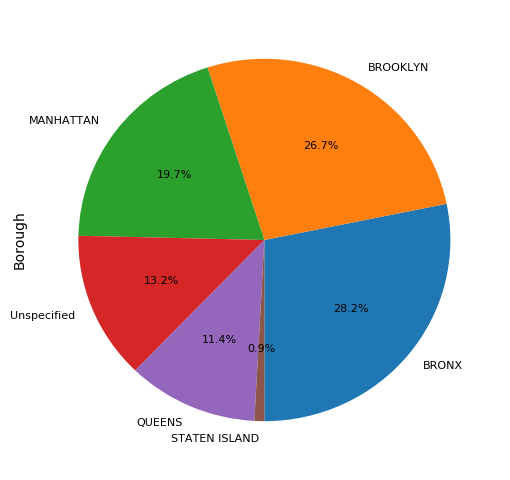

In [10]:
# Plotting complaint frequencies in a pie chart
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)

loc_df_heat["Borough"].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=8)
plt.show()

A better measure would possibly be to isolate the street and zip code.

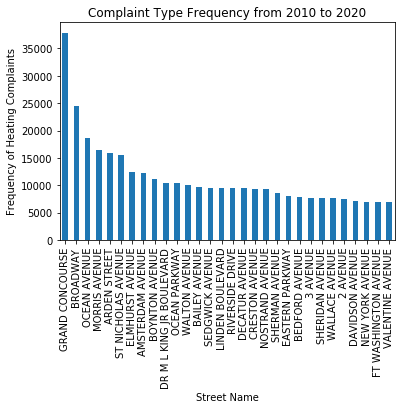

In [17]:
# Identifying streets with most issues
loc_df_heat["Street Name"].value_counts().head(30)

# Plotting heating complaint frequencies for most streets in a bar chart
loc_df_heat["Street Name"].value_counts().head(30).plot(kind='bar')
plt.xlabel('Street Name') # add to x-label to the plot
plt.ylabel('Frequency of Heating Complaints') # add y-label to the plot
plt.title('Complaint Type Frequency from 2010 to 2020') # add title to the plot
plt.show()

Grand Concourse, which is in the Bronx (can be checked in the data, but I personally knew this as well), is a clear hot spot with a lot of heating complaints. 

The last step is to identify the most commonly affected zip codes.

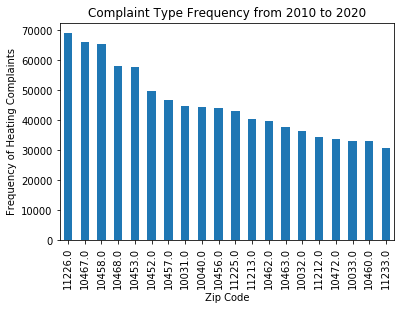

In [18]:
# Identifying streets with most issues
loc_df_heat["Incident Zip"].value_counts().head(20)

# Plotting heating complaint frequencies for most streets in a bar chart
loc_df_heat["Incident Zip"].value_counts().head(20).plot(kind='bar')
plt.xlabel('Zip Code') # add to x-label to the plot
plt.ylabel('Frequency of Heating Complaints') # add y-label to the plot
plt.title('Complaint Type Frequency from 2010 to 2020') # add title to the plot
plt.show()

In [20]:
# Find where top three zip codes are located.
df.loc[df["Incident Zip"]==11226.0].head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
6,6,45530969,02/02/2020 11:13:42 PM,NaN,GENERAL,RESIDENTIAL BUILDING,11226.0,180 LENOX ROAD,LENOX ROAD,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.653911,-73.953804
14,14,45529877,02/02/2020 04:09:57 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11226.0,297 LENOX ROAD,LENOX ROAD,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.654202,-73.949260
115,115,45527574,02/02/2020 01:41:09 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11226.0,2305 BEDFORD AVENUE,BEDFORD AVENUE,ADDRESS,BROOKLYN,Open,The complaint you filed is a duplicate of a co...,BROOKLYN,40.647447,-73.955697
125,125,45528393,02/02/2020 02:36:49 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11226.0,1 PARADE PLACE,PARADE PLACE,ADDRESS,BROOKLYN,Open,The complaint you filed is a duplicate of a co...,BROOKLYN,40.653091,-73.966134
187,187,45530968,02/02/2020 05:07:51 PM,NaN,PLUMBING,RESIDENTIAL BUILDING,11226.0,2505 BEDFORD AVENUE,BEDFORD AVENUE,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.642215,-73.954443


In [21]:
# 2nd most common 
df.loc[df["Incident Zip"]==10467.0].head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
126,126,45528434,02/02/2020 11:13:37 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10467.0,665 ALLERTON AVENUE,ALLERTON AVENUE,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.865410,-73.868626
217,217,45529788,02/02/2020 06:09:37 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,10467.0,856 EAST 213 STREET,EAST 213 STREET,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.878061,-73.860339
489,489,45529408,02/02/2020 03:39:12 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10467.0,323 EAST MOSHOLU PARKWAY NORTH,EAST MOSHOLU PARKWAY NORTH,ADDRESS,BRONX,Open,The complaint you filed is a duplicate of a co...,BRONX,40.871941,-73.880408
516,516,45528932,02/02/2020 07:23:31 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10467.0,66 WEST GUN HILL ROAD,WEST GUN HILL ROAD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.883207,-73.884279
562,562,45528907,02/02/2020 04:09:36 PM,NaN,PLUMBING,RESIDENTIAL BUILDING,10467.0,19 EAST GUN HILL ROAD,EAST GUN HILL ROAD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.882479,-73.880859


In [24]:
# 3rd most common
df.loc[df["Incident Zip"]==10458.0].head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
27,27,45530787,02/02/2020 07:20:04 PM,NaN,WATER LEAK,RESIDENTIAL BUILDING,10458.0,2902 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.871149,-73.889257
36,36,45531281,02/02/2020 10:55:29 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2438 WASHINGTON AVENUE,WASHINGTON AVENUE,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.858604,-73.890417
68,68,45528450,02/02/2020 10:39:56 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2664 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,Open,The complaint you filed is a duplicate of a co...,BRONX,40.866405,-73.894114
70,70,45532008,02/02/2020 05:23:19 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,10458.0,187 ST GEORGES CRESCENT,ST GEORGES CRESCENT,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.876299,-73.884591


## Conclusion: The Department of Housing Preservation and Development of New York City sees heating complaints from a number of locations. 

### i) It is most common in the Bronx with complaints in Brooklyn slowly following
### ii) Grand Concourse in the Bronx details the most heating complaints out of anywhere in New York
### iii) Zip code 11226, located in Brooklyn, reports the most heating complaints. However, the next six most highly reported zip codes are all in the Bronx.